# Введение в регрессионный анализ: интенсив по Python

*Алла Тамбовцева*

## Базовые графики в `pandas`

Импортируем библиотеку `pandas` с сокращенным названием `pd`:

In [1]:
import pandas as pd

Загрузим уже знакомый файл с данными по героям магической вселенной Дж.Роулинг (загрузка по ссылке сразу с Github):

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/allatambov/PyReg25/refs/heads/main/hp25.csv")

Начнем с построения **гистограммы** – посмотрим на распределение возраста героев. Для этого выберем столбец `Age` и применим к нему метод `.hist()` – от *histogram*:

<AxesSubplot:>

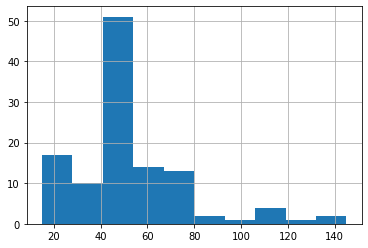

In [3]:
df["Age"].hist()

Графические методы обычно помимо самой картинки выдают вспомогательную информацию о частях графика (здесь сообщается, что были построены оси с подграфиком (`<AxesSubplot:>`). Чтобы эту несильно понятную информацию убрать, после строчки с кодом можно поставить точку с запятой:

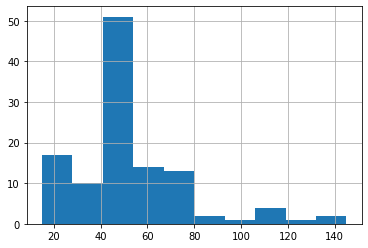

In [4]:
df["Age"].hist();

Для того, чтобы выполнить стандартные дизайнерские настройки графика, например, изменить цвет, достаточно добавить в метод `.hist()` дополнительные аргументы:

* `color`: цвет заливки;
* `edgecolor`: цвет границ столбцов;

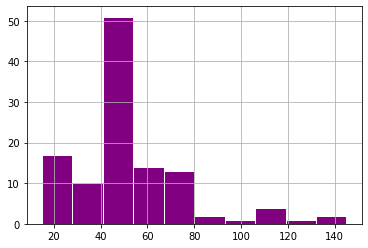

In [5]:
df["Age"].hist(color = "purple", edgecolor = "white");

Кроме того, можем убрать координатную сетку (*grid*), чтобы она не загораживала саму гистограмму:

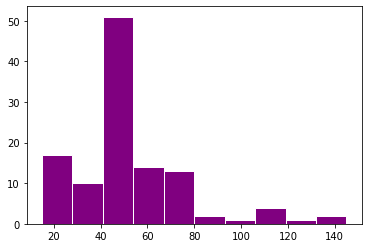

In [6]:
df["Age"].hist(color = "purple", edgecolor = "white", grid = False);

Посмотреть, какие цвета используются в Python, можно в официальной [документации](https://matplotlib.org/stable/gallery/color/named_colors.html) библиотеки `matplotlib` (графическая библиотека, ее модули используются внутри `pandas` при построении графиков). 

Кроме того, можно использовать и свои цвета – скопировать уникальный код цвета в формате HEX, который используется в веб-дизайне. Найти такой код можно при выборе цвета в [палитре](https://share.google/kFwNBkwEuEJ6SzcLE) или в готовых перечнях цветов (пример [здесь](https://colorscheme.ru/color-names.html)).

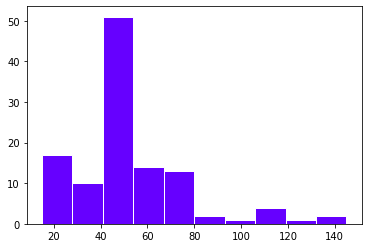

In [7]:
# цвет в формате HEX, не забывайте #

df["Age"].hist(color = "#6600FF", edgecolor = "white", grid = False);

По гистограмме видно, что распределение возраста скошено вправо – есть небольшое количество героев, чей возраст 100 лет и более (но на то это и волшебный мир). Чтобы убедиться, что большие значения возраста все же нетипичные, построим **ящик с усами** через метод `.plot.box()`, или, точнее, через метод `.box()`, который спрятан внутри набора графических функций `plot` в `pandas`:

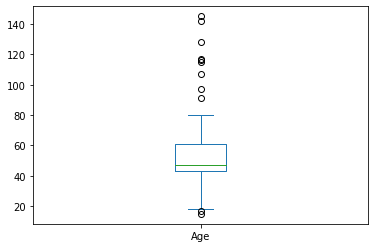

In [8]:
df["Age"].plot.box();

Да, действительно, возраст волшебников более 80 лет можно считать нетипично большим. Однако есть и нетипично маленькие значения – на предыдущих занятиях мы уже убеждались, что в таблице есть дети главных героев, которые еще слишком молоды. 

Ящик с усами состоит из линий разного типа: одни отвечают за сам ящик и медиану, другие – за усы. Поэтому легкого способа изменить график, чтобы цвета всех линий были разными, нет. Однако если нас устраивает единый цвет, можно добавить все тот же аргумент `color`:

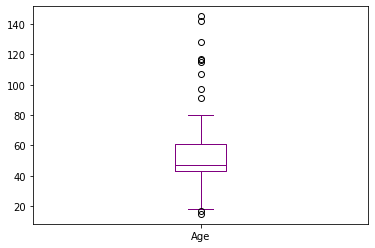

In [9]:
# на точки-выбросы цвет не распространяется

df["Age"].plot.box(color = "purple");

## Сортировка

Для сортировки строк в датафрейме на основе значений столбца или столбцов потребуется метод `.sort_values()`. В качестве аргумента этого метода в круглых скобках мы вписываем название столбца в кавычках: 

In [10]:
df.sort_values("Birth.year")

,Name,Gender,House,Wand,Wand.len,Skills,Birth.year,End.year,Age
70,Nicholas de Mimsy-Porpington,Male,Gryffindor,Unknown,NaN,NaN,1401.0,1492,91.0
103,Elphias Doge,Male,NaN,Unknown,NaN,Writing,1880.0,2025,145.0
3,Albus Percival Wulfric Brian Dumbledore,Male,Gryffindor,"15"" Elder Thestral tail hair core",15.0,Considered by many to be one of the most power...,1881.0,1997,116.0
137,Gellert Grindelwald,Male,NaN,"15"", Elder, Thestral tail hair core",15.0,Duelling,1883.0,1998,115.0
105,Aberforth Dumbledore,Male,NaN,Unknown,NaN,"Bartending, caring for Ariana",1883.0,2025,142.0
...,...,...,...,...,...,...,...,...,...
115,Benjy Fenwick,Male,NaN,Unknown,NaN,NaN,NaN,1981,NaN
116,Madame Olympe Maxime,Female,Beauxbatons Academy of Magic,Unknown,NaN,"An ‘excellent dancer’, in the words of Dumbled...",NaN,2025,NaN
135,Wilhelmina Grubbly-Plank,Female,NaN,Unknown,NaN,NaN,NaN,2025,NaN
138,Dobby,Male,NaN,NaN,NaN,"A type of magic specific to house-elves, perfo...",NaN,1998,NaN


По умолчанию сортировка производится по убыванию – сначала идут строки с самыми маленькими значениями года рождения (первая строчка – Почти Безголовый Ник, родившийся в 1401 году). Если мы хотим изменить порядок сортировки, то есть упорядочивать строчки по убыванию некоторого показателя, нужно «выключить» возрастание через аргумент `ascending = False`:

In [11]:
# теперь сверху – самые молодые герои

df.sort_values("Birth.year", ascending = False)

,Name,Gender,House,Wand,Wand.len,Skills,Birth.year,End.year,Age
128,Rose Granger-Weasley,Female,Gryffindor,Unknown,NaN,Chaser,2005.0,2025,20.0
125,Scorpius Hyperion Malfoy,Male,Slytherin,Unknown,NaN,NaN,2005.0,2025,20.0
124,Albus Severus Potter,Male,Slytherin,Unknown,NaN,NaN,2005.0,2025,20.0
127,James Sirius Potter,Male,Gryffindor,Unknown,NaN,NaN,2003.0,2025,22.0
126,Edward Remus Lupin,Male,Hufflepuff,Unknown,NaN,NaN,1998.0,2025,27.0
...,...,...,...,...,...,...,...,...,...
115,Benjy Fenwick,Male,NaN,Unknown,NaN,NaN,NaN,1981,NaN
116,Madame Olympe Maxime,Female,Beauxbatons Academy of Magic,Unknown,NaN,"An ‘excellent dancer’, in the words of Dumbled...",NaN,2025,NaN
135,Wilhelmina Grubbly-Plank,Female,NaN,Unknown,NaN,NaN,NaN,2025,NaN
138,Dobby,Male,NaN,NaN,NaN,"A type of magic specific to house-elves, perfo...",NaN,1998,NaN


При сортировке на основе текстового столбца происходит сортировка по алфавиту:

In [12]:
df.sort_values("Name")

,Name,Gender,House,Wand,Wand.len,Skills,Birth.year,End.year,Age
17,(Bill) William Arthur Weasley,Male,Gryffindor,Unknown,NaN,Highly skilled curse-breaker for Gringotts Wiz...,1970.0,2025,55.0
105,Aberforth Dumbledore,Male,NaN,Unknown,NaN,"Bartending, caring for Ariana",1883.0,2025,142.0
95,Alastor Moody,Male,NaN,Unknown,NaN,A highly accomplished Auror and an outstanding...,1960.0,1997,37.0
3,Albus Percival Wulfric Brian Dumbledore,Male,Gryffindor,"15"" Elder Thestral tail hair core",15.00,Considered by many to be one of the most power...,1881.0,1997,116.0
124,Albus Severus Potter,Male,Slytherin,Unknown,NaN,NaN,2005.0,2025,20.0
...,...,...,...,...,...,...,...,...,...
118,Viktor Krum,Male,Durmstrang Institute,"10¼"", Hornbeam, dragon heartstring",10.25,One of the best Seekers in the world,1976.0,2025,49.0
47,Vincent Crabbe,Male,Slytherin,Unknown,NaN,Beater,1979.0,1998,19.0
89,Walden Macnair,Male,Slytherin,Unknown,NaN,Liaising with giants,1970.0,2025,55.0
135,Wilhelmina Grubbly-Plank,Female,NaN,Unknown,NaN,NaN,NaN,2025,NaN


Обратите внимание: в таблице выше первым идет Билл Уизли, хотя формально буква *B* после *A*. Однако Python рассматривает все символы, не только буквы, поэтому круглая скобка имеет значение – специальные символы всегда опережают буквы при сортировке (как заглавные буквы опережают строчные).

Сортировку можно производить и по нескольким основаниям – нескольким столбцам сразу. Для более наглядных примеров сортировки подготовим новый датафрейм – удалим из текущего `df` все строчки, в которых есть хотя бы одна пустая ячейка:

In [13]:
# dropna() удаляет строки с хотя бы одним пропуском
# удаляем пропуски и сохраняем результат в df_full

df_full = df.dropna()
print(len(df_full))

19


В новом датфрейме всего 19 строк (в `df` было 140) – это основные герои, все характеристики которых нам известны:

In [14]:
df_full

,Name,Gender,House,Wand,Wand.len,Skills,Birth.year,End.year,Age
0,Harry James Potter,Male,Gryffindor,"11"" Holly phoenix feather",11.00,Parseltongue| Defence Against the Dark Arts | ...,1980.0,2025,45.0
1,Ronald Bilius Weasley,Male,Gryffindor,"12"" Ash unicorn tail hair",12.00,Wizard chess | Quidditch goalkeeping,1980.0,2025,45.0
2,Hermione Jean Granger,Female,Gryffindor,"10¾"" vine wood dragon heartstring",10.75,Almost everything,1979.0,2025,46.0
3,Albus Percival Wulfric Brian Dumbledore,Male,Gryffindor,"15"" Elder Thestral tail hair core",15.00,Considered by many to be one of the most power...,1881.0,1997,116.0
4,Rubeus Hagrid,Male,Gryffindor,"16"" Oak unknown core",16.00,Resistant to stunning spells| above average st...,1928.0,2025,97.0
5,Neville Longbottom,Male,Gryffindor,"13"" Cherry unicorn hair",13.00,Herbology,1980.0,2025,45.0
12,James Potter,Male,Gryffindor,"11"" Mahogany unknown core",11.00,Animagus| Seeker,1960.0,1981,21.0
14,Remus John Lupin,Male,Gryffindor,"10¼"" Cypress unicorn hair",10.25,Exceptionally gifted in Defence Against the Da...,1960.0,1998,38.0
15,Peter Pettigrew,Male,Gryffindor,"9¼"" Chestnut dragon heartstring",9.25,Animagus,1959.0,1998,39.0
18,Charles Weasley,Male,Gryffindor,"12"" Ash unicorn tail hair",12.00,Highly skilled dragon trainer| one-time Gryffi...,1972.0,2025,53.0


Отсортируем строки в полученном датафрейме сразу по двум столбцам – `House` и `Wand.len`. Что это значит?Герои будут упорядочены по названию факультета или школы в алфавитном порядке, а если в столбце `House` у них будут одинаковые значения, далее сортировка будет происходить по длине волшебной палочки в `Wand.len`. В таком случае названия нужных столбцов мы поместим в `.sort_values()` в виде списка:

In [15]:
# список – перечень в квадратных скобках, без них никак

df_full.sort_values(["House", "Wand.len"])

,Name,Gender,House,Wand,Wand.len,Skills,Birth.year,End.year,Age
104,Fleur Isabelle Delacour,Female,Beauxbatons Academy of Magic,"9½"", Rosewood, veela hair",9.50,"part Veela, and therefore possesses some of th...",1977.0,2025,48.0
118,Viktor Krum,Male,Durmstrang Institute,"10¼"", Hornbeam, dragon heartstring",10.25,One of the best Seekers in the world,1976.0,2025,49.0
15,Peter Pettigrew,Male,Gryffindor,"9¼"" Chestnut dragon heartstring",9.25,Animagus,1959.0,1998,39.0
14,Remus John Lupin,Male,Gryffindor,"10¼"" Cypress unicorn hair",10.25,Exceptionally gifted in Defence Against the Da...,1960.0,1998,38.0
2,Hermione Jean Granger,Female,Gryffindor,"10¾"" vine wood dragon heartstring",10.75,Almost everything,1979.0,2025,46.0
0,Harry James Potter,Male,Gryffindor,"11"" Holly phoenix feather",11.00,Parseltongue| Defence Against the Dark Arts | ...,1980.0,2025,45.0
12,James Potter,Male,Gryffindor,"11"" Mahogany unknown core",11.00,Animagus| Seeker,1960.0,1981,21.0
1,Ronald Bilius Weasley,Male,Gryffindor,"12"" Ash unicorn tail hair",12.00,Wizard chess | Quidditch goalkeeping,1980.0,2025,45.0
18,Charles Weasley,Male,Gryffindor,"12"" Ash unicorn tail hair",12.00,Highly skilled dragon trainer| one-time Gryffi...,1972.0,2025,53.0
5,Neville Longbottom,Male,Gryffindor,"13"" Cherry unicorn hair",13.00,Herbology,1980.0,2025,45.0


Так, среди гриффиндорцев (`Gryffindor` в `House`) сначала идет Питер Петтигрю с самой короткой волшебной палочкой, а далее – герои с палочками большей длины, завершается группа гриффиндорцев Хагридом с самой длинной палочкой. И везде, где число героев, принадлежащих одному факультету, больше одного, такая история.

В примере выше в обоих случаях сортировка производилась по возрастанию (настройки по умолчанию), по алфавиту и по увеличению длины палочки. Тут возникает логичный вопрос – а что, если сортировка происходит по нескольким столбцам, но порядок сортировки у них должен быть разным? Все просто – в уже знакомом аргументе `ascending` нужно разместить список из `True` и `False`:

In [16]:
# первое основание сортировки – House, для него ascending = True
# второе основание сортировки – Wand.len, для него ascending = False

df_full.sort_values(["House", "Wand.len"], ascending = [True, False])

,Name,Gender,House,Wand,Wand.len,Skills,Birth.year,End.year,Age
104,Fleur Isabelle Delacour,Female,Beauxbatons Academy of Magic,"9½"", Rosewood, veela hair",9.50,"part Veela, and therefore possesses some of th...",1977.0,2025,48.0
118,Viktor Krum,Male,Durmstrang Institute,"10¼"", Hornbeam, dragon heartstring",10.25,One of the best Seekers in the world,1976.0,2025,49.0
4,Rubeus Hagrid,Male,Gryffindor,"16"" Oak unknown core",16.00,Resistant to stunning spells| above average st...,1928.0,2025,97.0
3,Albus Percival Wulfric Brian Dumbledore,Male,Gryffindor,"15"" Elder Thestral tail hair core",15.00,Considered by many to be one of the most power...,1881.0,1997,116.0
5,Neville Longbottom,Male,Gryffindor,"13"" Cherry unicorn hair",13.00,Herbology,1980.0,2025,45.0
1,Ronald Bilius Weasley,Male,Gryffindor,"12"" Ash unicorn tail hair",12.00,Wizard chess | Quidditch goalkeeping,1980.0,2025,45.0
18,Charles Weasley,Male,Gryffindor,"12"" Ash unicorn tail hair",12.00,Highly skilled dragon trainer| one-time Gryffi...,1972.0,2025,53.0
0,Harry James Potter,Male,Gryffindor,"11"" Holly phoenix feather",11.00,Parseltongue| Defence Against the Dark Arts | ...,1980.0,2025,45.0
12,James Potter,Male,Gryffindor,"11"" Mahogany unknown core",11.00,Animagus| Seeker,1960.0,1981,21.0
2,Hermione Jean Granger,Female,Gryffindor,"10¾"" vine wood dragon heartstring",10.75,Almost everything,1979.0,2025,46.0


В таблице выше герои по-прежнему сортируются по названию факультета/школы в алфавитном порядке, а вот внутри каждого факультета/школы строки упорядочиваются в порядке убывания длины палочки.

**Важно.** Метод `.sort_values()` работает осторожно – он не изменяет исходный датафрейм `df_full`. Если мы посмотрим на него, убедимся, что порядок строк такой, как был изначально:

In [17]:
df_full

,Name,Gender,House,Wand,Wand.len,Skills,Birth.year,End.year,Age
0,Harry James Potter,Male,Gryffindor,"11"" Holly phoenix feather",11.00,Parseltongue| Defence Against the Dark Arts | ...,1980.0,2025,45.0
1,Ronald Bilius Weasley,Male,Gryffindor,"12"" Ash unicorn tail hair",12.00,Wizard chess | Quidditch goalkeeping,1980.0,2025,45.0
2,Hermione Jean Granger,Female,Gryffindor,"10¾"" vine wood dragon heartstring",10.75,Almost everything,1979.0,2025,46.0
3,Albus Percival Wulfric Brian Dumbledore,Male,Gryffindor,"15"" Elder Thestral tail hair core",15.00,Considered by many to be one of the most power...,1881.0,1997,116.0
4,Rubeus Hagrid,Male,Gryffindor,"16"" Oak unknown core",16.00,Resistant to stunning spells| above average st...,1928.0,2025,97.0
5,Neville Longbottom,Male,Gryffindor,"13"" Cherry unicorn hair",13.00,Herbology,1980.0,2025,45.0
12,James Potter,Male,Gryffindor,"11"" Mahogany unknown core",11.00,Animagus| Seeker,1960.0,1981,21.0
14,Remus John Lupin,Male,Gryffindor,"10¼"" Cypress unicorn hair",10.25,Exceptionally gifted in Defence Against the Da...,1960.0,1998,38.0
15,Peter Pettigrew,Male,Gryffindor,"9¼"" Chestnut dragon heartstring",9.25,Animagus,1959.0,1998,39.0
18,Charles Weasley,Male,Gryffindor,"12"" Ash unicorn tail hair",12.00,Highly skilled dragon trainer| one-time Gryffi...,1972.0,2025,53.0


Если мы хотим сохранить результаты сортировки, то есть полученный порядок строк, есть два пути:

* перезаписать старое значение `df_full` новым через присваивание с `=`:
        
        df_full = df_full.sort_values("House")
        
* добавить в `.sort_values()` аргумент `inplace = True`, который гарантирует сохранение изменений, но тогда без присваивания с `=`:

        df_full.sort_values("House", inplace = True)

### Группировка и агрегирование

Для группировки строк в датафрейме на основе значений столбца или столбцов потребуется метод `.groupby()`. Основание группировки – показатель с названиями групп – вписывается в круглые скобки как аргумент метода:

In [18]:
df_full.groupby("House")

Сам по себе этот метод возвращает объект специального типа, который от нас скрыт – временно хранится в какой-то ячейке памяти (здесь номер `0x11db755d0`). Если превратить этот объект во что-то более понятное, например, в список, мы увидим, что внутри перечислены пары *название группы – датафрейм со строками, соответствующими этой группе*. Проделаем это и выберем третий элемент такого списка – пару с номером 4:

In [19]:
list(df_full.groupby("House"))[4]

('Ravenclaw',                          Name  Gender      House  \
 32          Quirinus Quirrell    Male  Ravenclaw   
 37  Sybill Patricia Trelawney  Female  Ravenclaw   
 38         Garrick Ollivander    Male  Ravenclaw   
 
                                 Wand  Wand.len  \
 32       9" Alder unicorn hair bendy      9.00   
 37      9 ½” hazel unicorn hair core      9.50   
 38  12¾" Hornbeam dragon heartstring     12.75   
 
                                                Skills  Birth.year  End.year  \
 32  Learned in the theory of Defensive Magic| less...      1970.0      1992   
 37  A Seer, though the gift is unpredictable and u...      1962.0      2025   
 38         An incomparable understanding of wandcraft      1908.0      2025   
 
       Age  
 32   22.0  
 37   63.0  
 38  117.0  )

Действительно, пара элементов в круглых скобках. На первом месте – название факультета `Ravenclaw`, на втором – датафрейм с героями из `df_full`, где в `House` указано `Ravenclaw`. 

Теперь применим агрегирование – посчитаем какие-нибудь числовые характеристики по группам. Возьмем обычный метод `.describe()`:

In [20]:
df_full.groupby("House").describe()

Wand.len                                       \
                                count       mean       std    min      25%   
House                                                                        
Beauxbatons Academy of Magic      1.0   9.500000       NaN   9.50   9.5000   
Durmstrang Institute              1.0  10.250000       NaN  10.25  10.2500   
Gryffindor                       10.0  12.025000  2.112956   9.25  10.8125   
Hufflepuff                        1.0  12.250000       NaN  12.25  12.2500   
Ravenclaw                         3.0  10.416667  2.036132   9.00   9.2500   
Slytherin                         3.0  12.083333  1.842779  10.00  11.3750   

                                                   Birth.year               \
                                50%     75%    max      count         mean   
House                                                                        
Beauxbatons Academy of Magic   9.50   9.500   9.50        1.0  1977.000000   
Durmstrang Institute          10.25  10.250  10.25        1.0  1976.000000   
Gryffindor                    11.50  12.750  16.00       10.0  1957.900000   
Hufflepuff                    12.25  12.250  12.25        1.0  1977.000000   
Ravenclaw                      9.50  11.125  12.75        3.0  1946.666667   
Slytherin                     12.75  13.125  13.50        3.0  1952.333333   

                              ... End.year           Age             \
                              ...      75%     max count       mean   
House                         ...                                     
Beauxbatons Academy of Magic  ...   2025.0  2025.0   1.0  48.000000   
Durmstrang Institute          ...   2025.0  2025.0   1.0  49.000000   
Gryffindor                    ...   2025.0  2025.0  10.0  54.500000   
Hufflepuff                    ...   1995.0  1995.0   1.0  18.000000   
Ravenclaw                     ...   2025.0  2025.0   3.0  67.333333   
Slytherin                     ...   2011.5  2025.0   3.0  54.666667   

                                                                         
                                    std   min   25%   50%    75%    max  
House                                                                    
Beauxbatons Academy of Magic        NaN  48.0  48.0  48.0  48.00   48.0  
Durmstrang Institute                NaN  49.0  49.0  49.0  49.00   49.0  
Gryffindor                    28.999042  21.0  40.5  45.0  51.25  116.0  
Hufflepuff                          NaN  18.0  18.0  18.0  18.00   18.0  
Ravenclaw                     47.648015  22.0  42.5  63.0  90.00  117.0  
Slytherin                     15.044379  45.0  46.0  47.0  59.50   72.0  

[6 rows x 32 columns]

Что произошло выше? Python выбрал все числовые столбцы в каждой группе (`House`) и вычислил описательные статистики для них. Однако столбцов много, это мешает, выберем какой-нибудь один и опишем его отдельно:

In [21]:
df_full.groupby("House")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
House,,,,,,,,
Beauxbatons Academy of Magic,1.0,48.000000,NaN,48.0,48.0,48.0,48.00,48.0
Durmstrang Institute,1.0,49.000000,NaN,49.0,49.0,49.0,49.00,49.0
Gryffindor,10.0,54.500000,28.999042,21.0,40.5,45.0,51.25,116.0
Hufflepuff,1.0,18.000000,NaN,18.0,18.0,18.0,18.00,18.0
Ravenclaw,3.0,67.333333,47.648015,22.0,42.5,63.0,90.00,117.0
Slytherin,3.0,54.666667,15.044379,45.0,46.0,47.0,59.50,72.0


Теперь Python привел нам описание возраста героев из разных школ и с разных факультетов. Так как героев в датафрейме `df_full` без пропусков оказалось мало, некоторые группы состоят только из одного элемента – один ученик из академии Шармбатон (Beauxbatons), один – из Дурмстранга, один – из Пуффендуя (Hufflepuff). Для этих случаев Python не смог вычислить стандартное отклонение – делить нужно на $n-1$, то есть на 0, однако с остальными характеристиками все в порядке. Долгожителями могут похвастаться Гриффиндор и Когтевран (максимальный возраст 116 и 117 лет).

В завершение отметим, что как и в случае сортировки, оснований группировки может быть несколько:

In [22]:
# группируем по факультету, а в рамках каждого факультета – 
# еще и по полу

df_full.groupby(["House", "Gender"])["Age"].describe()

count       mean        std   min    25%  \
House                        Gender                                             
Beauxbatons Academy of Magic Female    1.0  48.000000        NaN  48.0  48.00   
Durmstrang Institute         Male      1.0  49.000000        NaN  49.0  49.00   
Gryffindor                   Female    1.0  46.000000        NaN  46.0  46.00   
                             Male      9.0  55.444444  30.594571  21.0  39.00   
Hufflepuff                   Male      1.0  18.000000        NaN  18.0  18.00   
Ravenclaw                    Female    1.0  63.000000        NaN  63.0  63.00   
                             Male      2.0  69.500000  67.175144  22.0  45.75   
Slytherin                    Female    1.0  47.000000        NaN  47.0  47.00   
                             Male      2.0  58.500000  19.091883  45.0  51.75   

                                      50%    75%    max  
House                        Gender                      
Beauxbatons Academy of Magic Female  48.0  48.00   48.0  
Durmstrang Institute         Male    49.0  49.00   49.0  
Gryffindor                   Female  46.0  46.00   46.0  
                             Male    45.0  53.00  116.0  
Hufflepuff                   Male    18.0  18.00   18.0  
Ravenclaw                    Female  63.0  63.00   63.0  
                             Male    69.5  93.25  117.0  
Slytherin                    Female  47.0  47.00   47.0  
                             Male    58.5  65.25   72.0